Found 2800 images belonging to 4 classes.
Found 396 images belonging to 4 classes.
Found 4000 files belonging to 4 classes.
Epoch 1/15
88/88 [==============================] - 1590s 18s/step - loss: 1.2450 - accuracy: 0.4546 - val_loss: 1.1569 - val_accuracy: 0.5202
Epoch 2/15
88/88 [==============================] - 1604s 18s/step - loss: 0.9407 - accuracy: 0.6350 - val_loss: 0.8530 - val_accuracy: 0.7500
Epoch 3/15
88/88 [==============================] - 1609s 18s/step - loss: 0.7889 - accuracy: 0.7171 - val_loss: 0.7756 - val_accuracy: 0.6843
Epoch 4/15
88/88 [==============================] - 1712s 19s/step - loss: 0.6848 - accuracy: 0.7804 - val_loss: 0.7577 - val_accuracy: 0.6490
Epoch 5/15
88/88 [==============================] - 1800s 20s/step - loss: 0.6268 - accuracy: 0.7925 - val_loss: 0.6386 - val_accuracy: 0.7424
Epoch 6/15
88/88 [==============================] - 1420s 16s/step - loss: 0.5548 - accuracy: 0.8318 - val_loss: 0.6605 - val_accuracy: 0.7904
Epoch 7/15
88/88 [

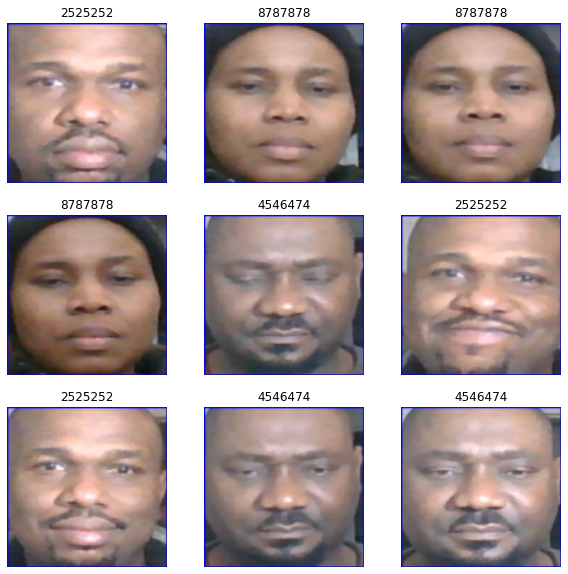

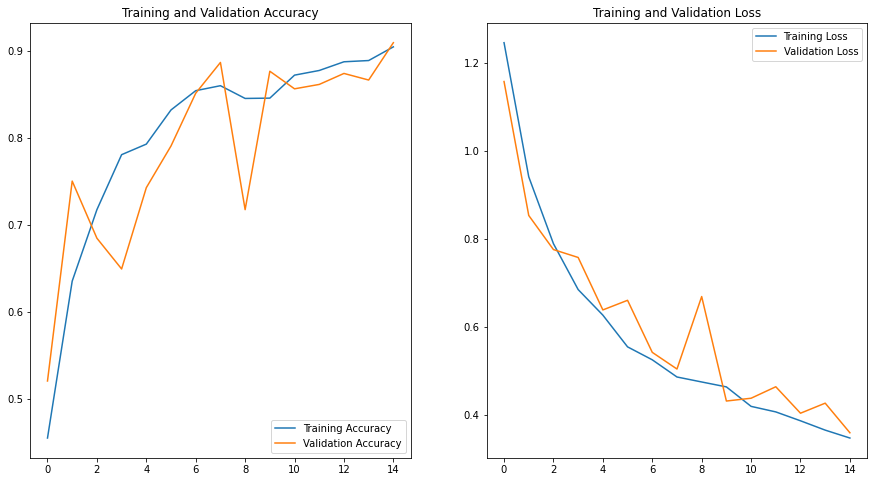

13/13 [==============================] - 67s 5s/step - loss: 0.3592 - accuracy: 0.9268


In [5]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report


epochs=15
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)



train_generator = train_datagen.flow_from_directory(
    'student_data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

test_generator = train_datagen.flow_from_directory(
     'student_data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

train_dataset = image_dataset_from_directory('student_data/train',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")
        
        
#call vgg model
vgg_model =  VGG19(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False

#converting from functionally model to sequential model
#removing the last 2 alyer to get rid of output layer in VGG16
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)

model = keras.Sequential()

for layer in vgg_model.layers:
  model.add(layer)

model.add(Dense(4, activation='softmax'))

model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = epochs)


acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']

loss = FIT.history['loss']
val_loss = FIT.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.evaluate(test_generator)



model.save('vggg19_model.h5')


1/1 [==============================] - 6s 6s/step


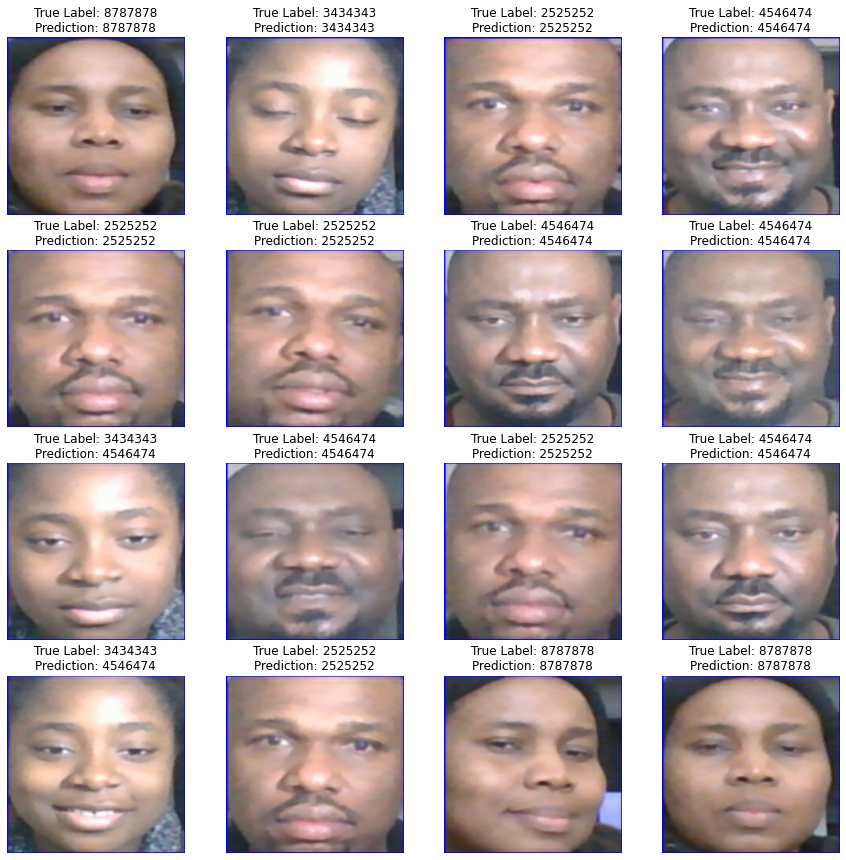

In [6]:
predict_list = []
plt.figure(figsize = (15,15))
for image , label in train_dataset.take(1):  
    np.set_printoptions(suppress=True)
    # Create the array of the right shape to feed into the keras model
    # The 'length' or number of images you can put into the array is
    # determined by the first position in the shape tuple, in this case 1.
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    # turn the image into a numpy array
    image_array = np.asarray(image)
    # Normalize the image
    data = (image_array.astype(np.float32) / 127.0) - 1
    # run the inference
    prediction = model.predict(data)
    #print(prediction)
     
    for i in range(16) :      
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title('True Label: ' + class_name[label[i]] + '\n' + 'Prediction: ' + str(class_name[np.argmax(prediction[i])]))
        plt.axis("off")

In [ ]:
import numpy as np
import pandas as pd
import os
from os import listdir
from PIL import Image
from numpy import array
from numpy import asarray
import seaborn as sns

#Load test data set
pathToTestData = 'student_data/test'
test_img_list = list()

shape_sum = 0
class_name_numb = dict()
train_avg_shape = 224

for dirname, _, filenames in os.walk(pathToTestData):
    for filename in filenames:
        img_data = Image.open(os.path.join(dirname, filename))

        resizedImage = img_data.resize((train_avg_shape, train_avg_shape))
        resizedImage = resizedImage.convert('RGB')
        resizedImage = asarray(resizedImage) / 255

        test_img_list.append([resizedImage, filename])

X_test = np.zeros((len(test_img_list), train_avg_shape, train_avg_shape, 3), dtype='float32')

for i, img in enumerate(test_img_list):
    X_test[i] = test_img_list[i][0]

    #Predict on test data
predictions = model.predict(X_test, batch_size=None, verbose=0, steps=None,
                               callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
predictions = pd.DataFrame(predictions)

inverse_label_map = dict()
for k, v in train_generator.class_indices.items():
    inverse_label_map[v] = k

pred_label_num = predictions.idxmax(axis=1)
pred_label_num_new = list()

for x in pred_label_num:
    y = inverse_label_map[x]
    pred_label_num_new.append(y)

pred_label_num_new = pd.DataFrame(pred_label_num_new)
print(pred_label_num_new[0])

pred = pd.DataFrame()

testImages = pd.DataFrame(test_img_list)
pred.insert(0, 'file', testImages[1])
pred.insert(1, 'species', pred_label_num_new[0])
pred.head()

pred.to_csv('Predictions_NEWVGG19.csv', index=None, header=True)

df = pd.read_csv('Predictions_NEWVGG19.csv')
df

In [ ]:
model.summary()